In [57]:
import numpy as np
import matplotlib.pyplot as plt


In [58]:
n_years = 1
n_months = 12*n_years
n_days = 365*n_years
n_hours = n_days*24
n_seconds = int(n_hours*60)


Distribution of outcome per YEAR

In [178]:
n_years_to_simulate = 100000
mu = 0.15 # could be mean gain in percentage
sigma = 0.10 # 1 std
s = np.random.normal(mu, sigma, n_years_to_simulate)


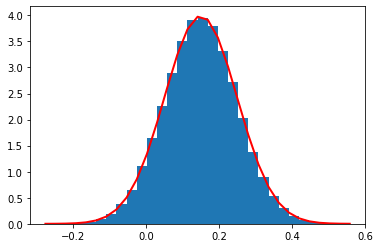

In [179]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [180]:
# count number of values where equal or larger than zero

print('Probability to have a year with profit: {}'.format(np.sum(s > 0)/len(s)))

Probability to have a year with profit: 0.93303


Now we will try to estimate the probability to have a second with profit given that we know the probability to have a year with profit

In [181]:
def generate_distribution(mu, sigma, n_points):
    distribution = np.random.normal(mu, sigma, n_points)
    return distribution

def calc_profit_per_year(rates, logging=False, plot=False):
    if plot:
        worth = np.zeros(len(rates) + 1) # we will have a start worth
        worth[0] = 1 #buy for 1 in the beginning
        for t, rate in enumerate(rates):
            worth[t+1] = worth[t]*(1 + rate)
        plt.plot(range(len(worth)), worth)
        plt.show()
        if logging:
            print('Profit for the current year: {}'.format(worth[-1]))
    else:
        current_worth = 1
        for t, rate in enumerate(rates):
            current_worth = current_worth*(1 + rate)
        if logging:
            print('Profit for the current year: {}'.format(current_worth))
        return current_worth


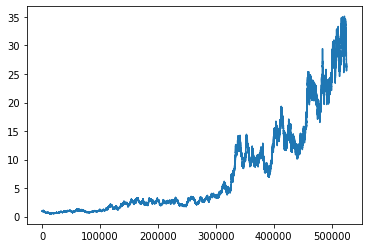

In [202]:
mu = 0.0000099999
sigma = 0.003
rates = generate_distribution(mu, sigma, n_seconds)
calc_profit_per_year(rates, logging=False, plot=True)

In [203]:
# optimization 
from scipy import optimize

def func(x):
    # x[0] = mu, x[1] = sigma
    count = 0
    n_runs=1000
    for i in range(n_runs):
        rates = generate_distribution(x[0], x[1], n_seconds)
        worth = calc_profit_per_year(rates)
        if worth > 1:
            count += 1
    return [count/n_runs - 0.93303, 0]

result = optimize.root(func , x0 = [0.00001, 0.003])
x = result.x
A, B = x                       
x
    

array([1.00000005e-05, 3.00000000e-03])

In [263]:
mu = 0.0000099999
sigma = 3.00000000e-03
temp = list()
for n in range(1000):
    p = generate_distribution(mu, sigma, n_seconds)
    temp.append(np.sum(p > 0)/len(p))

print('Probability to have a second with profit: {}'.format(np.mean(temp)))

Probability to have a second with profit: 0.5012888394216134


Now we need to validate this estimation

In [266]:
def run_simulation(mu, sigma, n_runs=1000):
    count = 0
    for i in range(n_runs):
        rates = generate_distribution(mu, sigma, n_seconds)
        worth = calc_profit_per_year(rates)
        if worth > 1:
            count += 1
    print('mu: {}'.format(mu))
    print('Sigma: {}'.format(sigma))
    print('Probability for positive profit: {}'.format(count/n_runs))

mus = [0.0000099999, 0.0000099999, 0.0000099999]
sigmas = [0.003, 0.0032, 0.0025]
for mu, sigma in zip(mus, sigmas):
    run_simulation(mu, sigma)

mu: 9.9999e-06
Sigma: 0.003
Probability for positive profit: 0.909
mu: 9.9999e-06
Sigma: 0.0032
Probability for positive profit: 0.854
mu: 9.9999e-06
Sigma: 0.0025
Probability for positive profit: 0.974
